# Classification with Decision Trees

© 2016 STREAMBRIGHT DATA LLC, ALL RIGHTS RESERVED

Learn one of the most popular classification tool the decision trees and a quick introduction to different ensemble methods (Random Forests, Extremely Randomised Trees, AdaBoost, Gradient Tree Boosting).

## Theory of Decision Trees

![example](../files/0601_example.png "DT Example")

### Why do we use decision trees?

Among others, there are 2 neat features of the decision tree classification:
1. We can use it for feature selection based on feature importance
2. We can easily observe the tree structure and get onformation about how each feature adds value to the classification.

### How to Build a Tree

![dt_data](../files/0602_data.png "DT Data")

![dt_exmplain](../files/0603_explain.png "DT Explain")

#### Impurity measurements:
* Entropy
* Gini
* Classification Error

![impurity_figures](../files/0604_impurity_figures.png "Impurity Figures")

![gini](../files/0605_gini.png "Gini")

### An example tree

![iris](../files/0606_iris.svg "Iris")

## Example with Titanic Dataset

Lets see a decision tree example on a "Toy" dataset.

feature name | description
-- | --
survival | Survival (0 = No; 1 = Yes)
pclass | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name | Name
sex | Sex
age | Age
sibsp | Number of Siblings/Spouses Aboard
parch | Number of Parents/Children Aboard
ticket | Ticket Number
fare | Passenger Fare
cabin | Cabin
embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


### Preparing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
import pandas as pd
data = pd.read_csv("../files/titanic.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### Selecting features for classification

Sidenote: cannot use 'nominal' data types in sci-kit learn

In [4]:
data.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 41.8+ KB


Filling NA data and recoding nominal type to be able to use.

In [6]:
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Sex"] = data["Sex"].apply(lambda sex: 0 if sex == 'male' else 1)

In [7]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008
std,0.486592,0.836071,0.477990,13.002015,1.102743
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000


Splitting the data into training and test sets.

In [8]:
X = data.drop('Survived', axis=1)  
y = data.ix[:, 'Survived']

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 4), (712,), (179, 4), (179,))

### Building the first decision tree

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
clf = clf.fit(X_train, y_train)

Visualizing the tree:

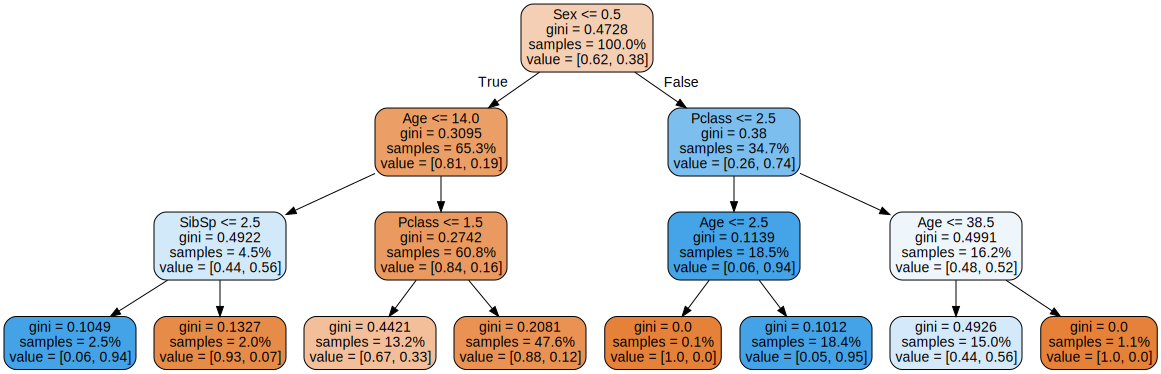

In [10]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, out_file="mytree.dot", feature_names=X.columns, filled=True, rounded=True, proportion=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

On the tree we can visually observe the path to each leafs.

### Get info on how good the model is

First using the gini then the entropy parameter.

In [11]:
from sklearn.cross_validation import cross_val_score
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
cross_val_score(clf, X_train, y_train, cv=10).mean()

0.7810949027498324

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
cross_val_score(clf, X_train, y_train, cv=10).mean()

0.77968645204560694

We can run the GridSearchCV again to determine the best parameters for constructing the tree.

In [13]:
from sklearn.grid_search import GridSearchCV

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(1,10)
min_samples_leaf = np.arange(1,20,2)
min_samples_split = np.arange(1,20,2)

parameters = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 
              'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
clf = tree.DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf, parameters, cv=10)
clf.fit(X_train, y_train)

print clf.best_score_
print clf.best_params_

0.827247191011
{'min_samples_split': 1, 'splitter': 'random', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}


### Feature Importance with Decision Trees

Feature ranking:
1. feature Sex (0.402842)
2. feature Age (0.335211)
3. feature Pclass (0.146320)
4. feature SibSp (0.115627)


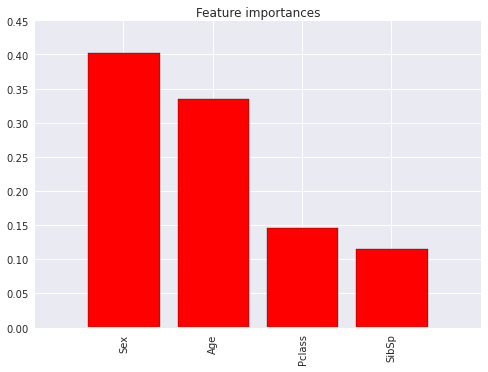

In [14]:
# Build a forest and compute the feature importances
clf = tree.DecisionTreeClassifier(random_state=0)

clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = X.columns[indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_order[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), feature_order, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

## Bank data classification with decision trees

### Loading and preparing the data

In [15]:
data = pd.read_csv("../files/bank.csv")
data.drop(data.ix[:,1:10], axis=1, inplace=True)
data.drop("poutcome", axis=1, inplace=True)
n = 4500
sample_yes = data.ix[data.y == "yes"].sample(n=n, replace=False, random_state=0)
sample_no = data.ix[data.y == "no"].sample(n=n, replace=False, random_state=0)
df = pd.concat([sample_yes, sample_no])
df = df.sample(frac=1, random_state=0)
X = df.drop('y', axis=1)  
y = df.ix[:, 'y']
y.replace("yes", 1, inplace=True)
y.replace("no", 0, inplace=True)

In [16]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191,no


### Splitting the data into test and training sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7200, 10), (7200,), (1800, 10), (1800,))

### Building the classification model and getting the scores

In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=10).mean()

0.83555890025508028

### Running a grid search on the data for best parameters

This will take time since we have a bigger dataset and a ton of parameter values.

In [19]:
from sklearn.grid_search import GridSearchCV
from datetime import datetime

start_time = datetime.now()

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(1,10)
min_samples_leaf = np.arange(1,20,2)
min_samples_split = np.arange(1,20,2)

parameters = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 
              'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
clf = tree.DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf, parameters, cv=10)
clf.fit(X_train, y_train)

print clf.best_score_
print clf.best_params_

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

KeyboardInterrupt: 

### Feature importance with best parameters

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_split=11, splitter='random',
                                  criterion='entropy', max_depth=9, min_samples_leaf=5, random_state=0)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = X.columns[indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_order[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), feature_order, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

### Visualizing the tree

First, fit a new model with a lower max_depth parameter to be able to see the tree easily.

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, out_file="mytree.dot", feature_names=X.columns, filled=True, rounded=True, proportion=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Follow trough a path during prediction

In [ ]:
clf.predict([[  3.30000000e+01,   1.00000000e+02,   1.00000000e+00,
          9.99000000e+02,   0.00000000e+00,  -1.80000000e+00,
          1.08930000e+01,  -4.42000000e+01,   1.00300000e+00,
          5.20000000e+03]])

In [ ]:
X_train.iloc[:1,:]

In [ ]:
X_train.iloc[:1,:].values

## Ensemble methods

Combine several machine learning techniques into one predictive model in order to decrease the variance (bagging), bias (boosting) or improving the predictive force (stacking alias ensemble).

* Bagging (Bootstrap Aggregating) - minimize variance
* Boosting (Converting Weak Models to Strong Ones) - minimize bias (increase accuracy)

Combination techniques:
* Majority Voting, Weighted Voting - classification
* Simple Averaging, Weighted Averaging - regression

In sci-kit learn examples:
* Bagging: Bagging Classifier, Random Forests, Extremely Randomized Trees
* Boosting: AdaBoost, Gradient Tree Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

cv = 10

clf = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print "Decision Tree Score: %.3f" % scores.mean()
print "Decision Tree Variance: %.4f \n" % scores.std()

clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print "Bagging Score: %.3f" % scores.mean()
print "Bagging Variance: %.4f \n" % scores.std()

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print "Random Forest Score: %.3f" % scores.mean()
print "Random Forest Variance: %.4f \n" % scores.std()

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print "Extremely Randomized Trees Score: %.3f" % scores.mean()
print "Extremely Randomized Trees Variance: %.4f \n" % scores.std()

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print "AdaBoost Score: %.3f" % scores.mean()
print "AdaBoost Variance: %.4f \n" % scores.std()

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=cv)
print "Gradient Tree Boosting Score: %.3f" % scores.mean()
print "Gradient Tree Boosting Variance: %.4f \n" % scores.std()